<a href="https://colab.research.google.com/github/TashiNyangmi/CEO_Jobs_Council/blob/master/Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Libraries and Importing Data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', index_col= 'date', parse_dates= True)

In [ ]:
df = df.loc['2020-March':]

# TEAM

Team 6

* Tashi Tsering Gurung
* Laxmi Gurung
* Shariq Mian



# New York State  - Covid 19

PROBLEM STATEMENT: **"help your general audience and New Yorkers gain some insights"**

### code

In [ ]:
ny_df = df[df['state']=='New York'].copy()
ny_df.drop(['state','fips'], axis = 1, inplace = True)
ny_df.columns = ['total_' + column for column in ny_df.columns]

ny_df.head()

,total_cases,total_deaths
date,,
2020-03-01,1,0
2020-03-02,1,0
2020-03-03,2,0
2020-03-04,11,0
2020-03-05,22,0


In [ ]:
ny_df = ny_df.resample('m').last()
ny_df.head()

,total_cases,total_deaths
date,,
2020-03-31,76211,1929
2020-04-30,309696,23616
2020-05-31,375575,29699
2020-06-30,398142,31776
2020-07-31,419723,32372


In [ ]:
ny_df_new = ny_df.diff()
ny_df_new.columns = [column.replace('total_','new_') for column in ny_df_new.columns]
ny_df_new.head()

,new_cases,new_deaths
date,,
2020-03-31,NaN,NaN
2020-04-30,233485.0,21687.0
2020-05-31,65879.0,6083.0
2020-06-30,22567.0,2077.0
2020-07-31,21581.0,596.0


In [ ]:
ny_df_new.iloc[0] = [76211, 1929] # refactor this

In [ ]:
ny_df_new.head()

,new_cases,new_deaths
date,,
2020-03-31,76211.0,1929.0
2020-04-30,233485.0,21687.0
2020-05-31,65879.0,6083.0
2020-06-30,22567.0,2077.0
2020-07-31,21581.0,596.0


In [ ]:
ny_df_new['new_cases'] = ny_df_new['new_cases'].astype(int)
ny_df_new['new_deaths'] = ny_df_new['new_deaths'].astype(int)

In [ ]:
df_list = [ny_df, ny_df_new]

In [ ]:
ny_df1 = pd.concat(df_list, axis = 1, join = 'inner')
ny_df1.head()

,total_cases,total_deaths,new_cases,new_deaths
date,,,,
2020-03-31,76211,1929,76211,1929
2020-04-30,309696,23616,233485,21687
2020-05-31,375575,29699,65879,6083
2020-06-30,398142,31776,22567,2077
2020-07-31,419723,32372,21581,596


### visualizations

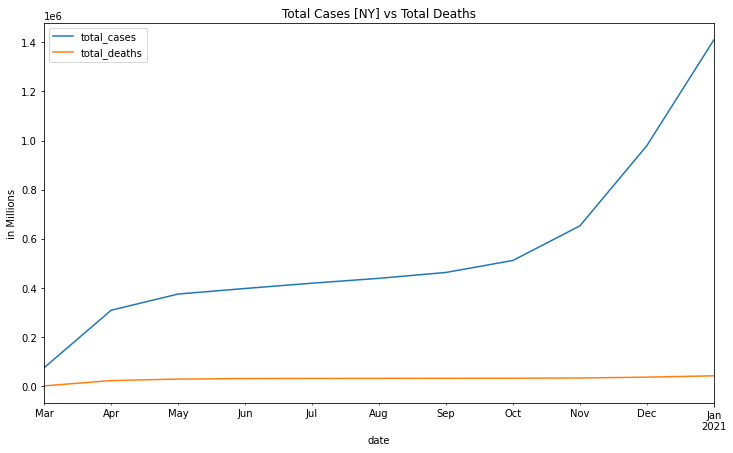

In [ ]:
ax = ny_df.plot(figsize=(12,7))
ax.set_ylabel("in Millions")
plt.title('Total Cases [NY] vs Total Deaths');

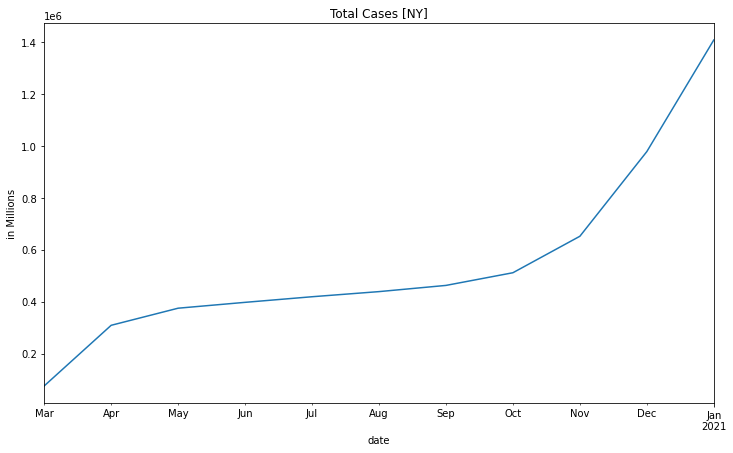

In [ ]:
ax = ny_df['total_cases'].plot(figsize=(12,7))
ax.set_ylabel("in Millions")
plt.title('Total Cases [NY]');

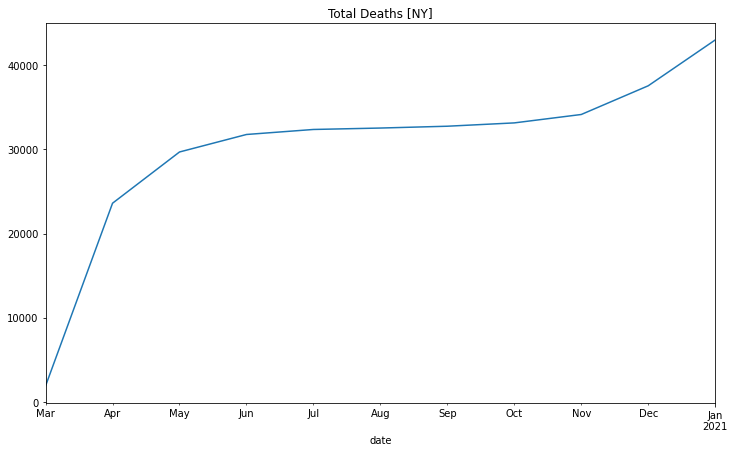

In [ ]:
ny_df['total_deaths'].plot(figsize=(12,7))
plt.title('Total Deaths [NY]');

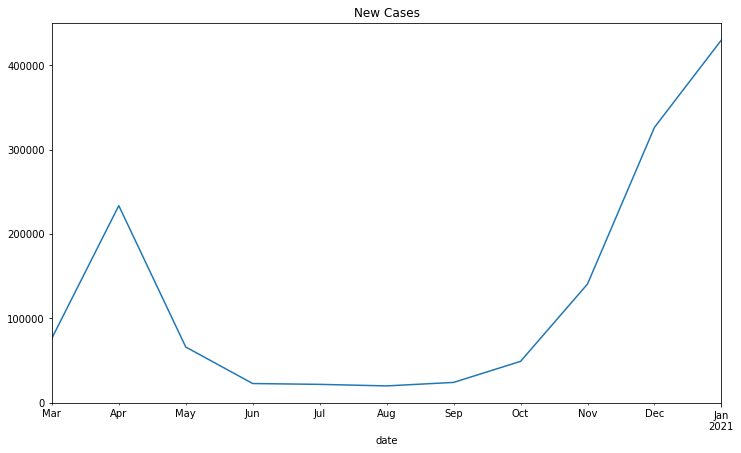

In [ ]:
ny_df_new['new_cases'].plot(figsize=(12,7))
plt.title('New Cases');

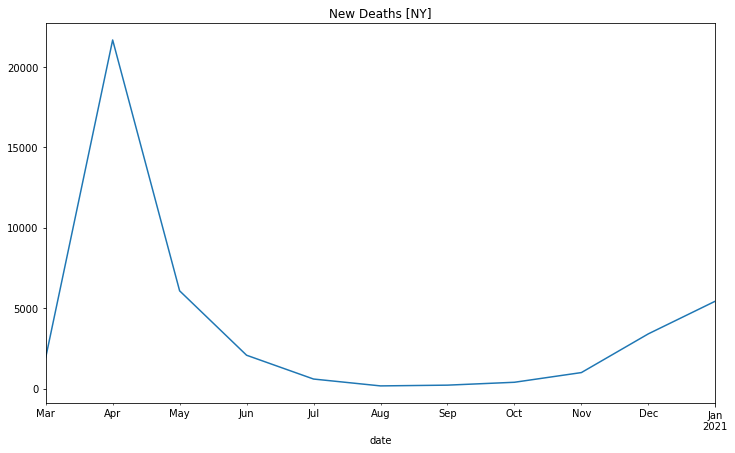

In [ ]:
ny_df_new['new_deaths'].plot(figsize=(12,7))
plt.title('New Deaths [NY]');

### code

In [ ]:
ny_df1['cases_pct'] = round(ny_df_new['new_cases'].pct_change(),2)
ny_df1['deaths_pct'] = round(ny_df_new['new_deaths'].pct_change(),2)
ny_df1.head()

,total_cases,total_deaths,new_cases,new_deaths,cases_pct,deaths_pct
date,,,,,,
2020-03-31,76211,1929,76211,1929,NaN,NaN
2020-04-30,309696,23616,233485,21687,2.06,10.24
2020-05-31,375575,29699,65879,6083,-0.72,-0.72
2020-06-30,398142,31776,22567,2077,-0.66,-0.66
2020-07-31,419723,32372,21581,596,-0.04,-0.71


In [ ]:
data = ny_df1.iloc[2:]

### visualizations

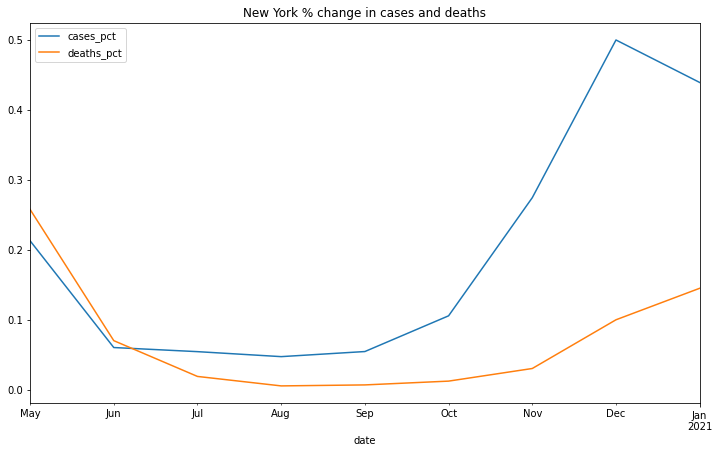

In [ ]:
data[['cases_pct', 'deaths_pct']].plot(figsize=(12,7))
plt.title('New York % change in cases and deaths');

# NEW YORK, NEW JERSEY, PENNSYLVANIA, MASSACHUSETTS, CONNECTICUT

### Code

In [ ]:
states = ['New York','New Jersey', 'Pennsylvania', 'Massachusetts', 'Connecticut']

In [ ]:
def covid_state(state):
  temp = df[df['state'] == state].copy()
  temp.drop(['fips', 'state'], axis = 1, inplace=True)
  temp.columns = ['total_' + column for column in temp.columns]
  temp = temp.resample('m').last()

  temp_new = temp.diff()
  temp_new.columns = [column.replace('total_','new_') for column in temp.columns]
  temp_new.iloc[0] = [i for i in temp.iloc[0]]
  df_list = [temp, temp_new]
  m_df = pd.concat(df_list, axis = 1, join = 'inner')
  m_df['cases_pct'] = round(temp_new['new_cases'].pct_change(),2)
  m_df['deaths_pct'] = round(temp_new['new_deaths'].pct_change(),2)
  return (m_df)

In [ ]:
df_list = [covid_state(state) for state in states]
covid_master_df = pd.concat(df_list, axis = 1, keys = states)
covid_master_df.head()

New York                         ... Connecticut                     
           total_cases total_deaths new_cases  ...  new_deaths cases_pct deaths_pct
date                                           ...                                 
2020-03-31       76211         1929   76211.0  ...        69.0       NaN        NaN
2020-04-30      309696        23616  233485.0  ...      2188.0      6.86      30.71
2020-05-31      375575        29699   65879.0  ...      1687.0     -0.41      -0.23
2020-06-30      398142        31776   22567.0  ...       378.0     -0.70      -0.78
2020-07-31      419723        32372   21581.0  ...       110.0     -0.24      -0.71

[5 rows x 30 columns]

### Visualization

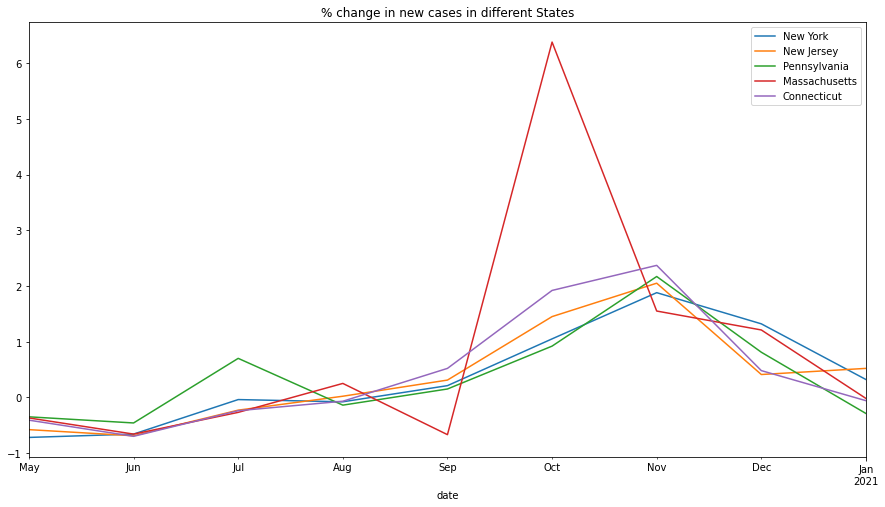

In [ ]:
fig, ax = plt.subplots()
for state in states:
  ax = covid_master_df.loc['2020-05':, (state, 'cases_pct')].plot(figsize = (15,8), ax = ax)
  ax.legend(states)
plt.hlines(0, xmin = 0, xmax = 12, linestyles = 'dashed')
plt.title('% change in new cases in different States');

### Without Massachusetts

In [ ]:
states_no_mas = states
states_no_mas.remove('Massachusetts')

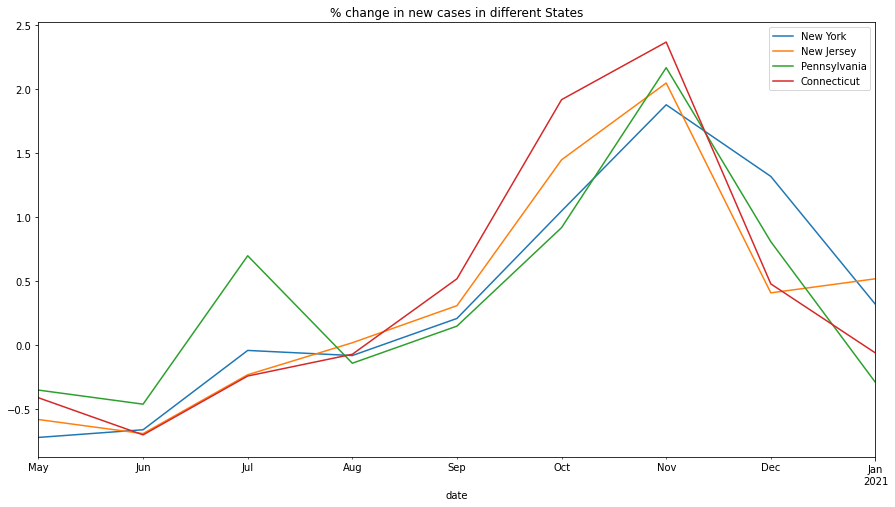

In [ ]:
fig, ax = plt.subplots()
for state in states_no_mas:
  ax = covid_master_df.loc['2020-05':, (state, 'cases_pct')].plot(figsize = (15,8), ax = ax)
  ax.legend(states)
plt.hlines(0, xmin = 0, xmax = 12, linestyles = 'dashed')
plt.title('% change in new cases in different States');

### Deaths Percentage

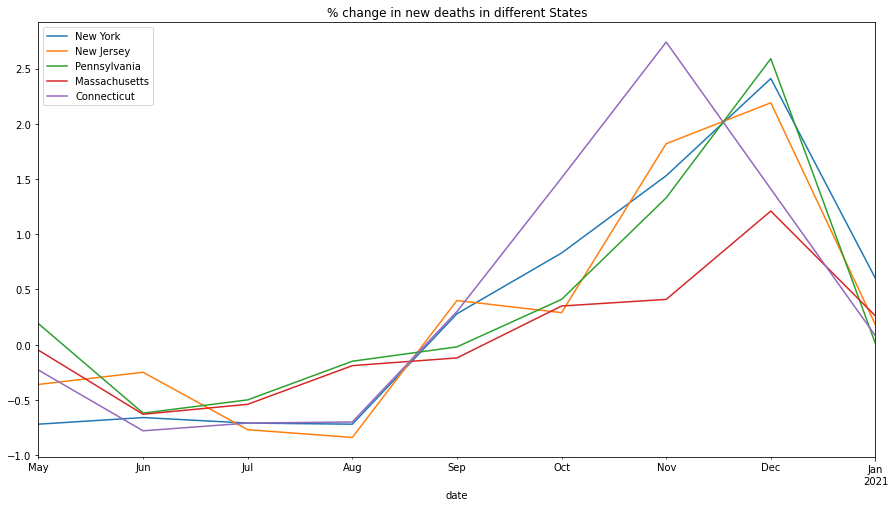

In [ ]:
fig, ax = plt.subplots()
for state in states:
  ax = covid_master_df.loc['2020-05':, (state, 'deaths_pct')].plot(figsize = (15,8), ax = ax)
  ax.legend(states)
plt.hlines(0, xmin = 0, xmax = 12, linestyles = 'dashed')
plt.title('% change in new deaths in different States');

# National Data Vs New York State


### Code

In [ ]:
temp = df.copy()
temp.drop(['fips', 'state'], axis = 1, inplace=True)

In [ ]:
temp.head()

,total_cases,total_deaths
date,,
2020-03-01,6.769231,0.230769
2020-03-02,6.933333,0.400000
2020-03-03,7.812500,0.625000
2020-03-04,9.470588,0.705882
2020-03-05,10.857143,0.571429


In [ ]:
df_monthly = temp.groupby(temp.index).mean()
df_monthly.head()

,total_cases,total_deaths
date,,
2020-03-01,6.769231,0.230769
2020-03-02,6.933333,0.400000
2020-03-03,7.812500,0.625000
2020-03-04,9.470588,0.705882
2020-03-05,10.857143,0.571429


In [ ]:
temp = df_monthly.loc['2020-03-01':].copy()
temp.columns = ['total_' + column for column in temp.columns]
national_df = temp.resample('m').last()
national_df.head()

,total_cases,total_deaths
date,,
2020-03-31,3426.563636,78.254545
2020-04-30,19559.200000,1148.000000
2020-05-31,32714.581818,1897.800000
2020-06-30,48242.200000,2317.490909
2020-07-31,83121.254545,2797.490909


In [ ]:
national_df_new = national_df.diff()
national_df_new.columns = [column.replace('total_','new_') for column in national_df.columns]
national_df_new.head()

,new_cases,new_deaths
date,,
2020-03-31,NaN,NaN
2020-04-30,16132.636364,1069.745455
2020-05-31,13155.381818,749.800000
2020-06-30,15527.618182,419.690909
2020-07-31,34879.054545,480.000000


In [ ]:
national_df.iloc[0]

total_cases     3426.563636
total_deaths      78.254545
Name: 2020-03-31 00:00:00, dtype: float64

In [ ]:
national_df_new.iloc[0] = [3426.563636, 78.254545]
national_df_new.head()

,new_cases,new_deaths
date,,
2020-03-31,3426.563636,78.254545
2020-04-30,16132.636364,1069.745455
2020-05-31,13155.381818,749.800000
2020-06-30,15527.618182,419.690909
2020-07-31,34879.054545,480.000000


In [ ]:
df_list = [national_df, national_df_new]

In [ ]:
national_df1 = pd.concat(df_list, axis = 1, join = 'inner')
national_df1.head()

,total_cases,total_deaths,new_cases,new_deaths
date,,,,
2020-03-31,3426.563636,78.254545,3426.563636,78.254545
2020-04-30,19559.200000,1148.000000,16132.636364,1069.745455
2020-05-31,32714.581818,1897.800000,13155.381818,749.800000
2020-06-30,48242.200000,2317.490909,15527.618182,419.690909
2020-07-31,83121.254545,2797.490909,34879.054545,480.000000


In [ ]:
national_df1 = round(national_df1, 0)
national_df1.head()

,total_cases,total_deaths,new_cases,new_deaths
date,,,,
2020-03-31,3427.0,78.0,3427.0,78.0
2020-04-30,19559.0,1148.0,16133.0,1070.0
2020-05-31,32715.0,1898.0,13155.0,750.0
2020-06-30,48242.0,2317.0,15528.0,420.0
2020-07-31,83121.0,2797.0,34879.0,480.0


### Visualization

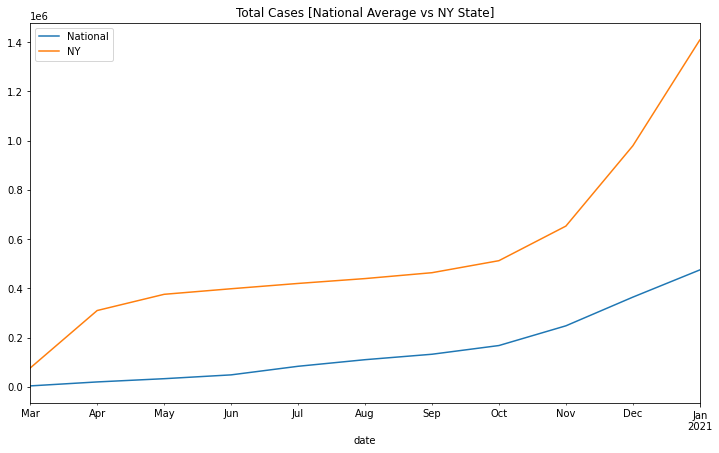

In [ ]:
national_df['total_cases'].plot(figsize=(12,7))
ny_df['total_cases'].plot(figsize=(12,7))
plt.title('Total Cases [National Average vs NY State]')
plt.legend(['National','NY']);

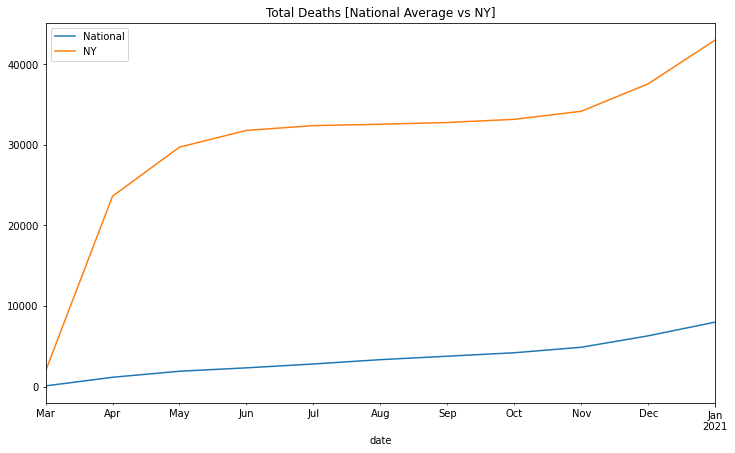

In [ ]:
national_df['total_deaths'].plot(figsize=(12,7))
ny_df['total_deaths'].plot(figsize=(12,7))
plt.title('Total Deaths [National Average vs NY]')
plt.legend(['National','NY']);

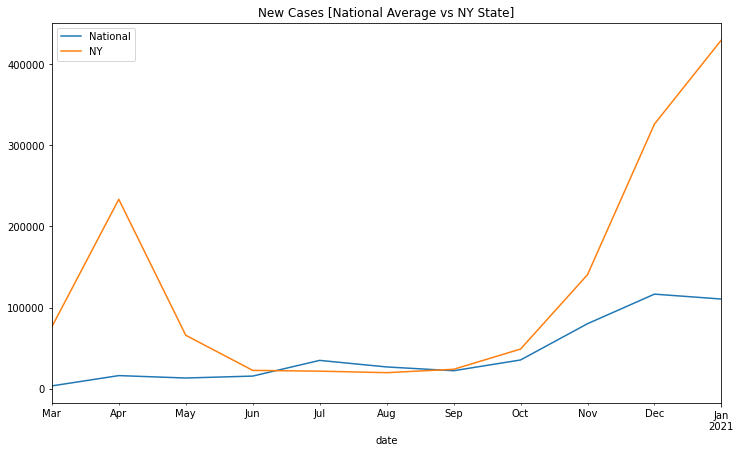

In [ ]:
national_df_new['new_cases'].plot(figsize=(12,7)) # blue is national
ny_df_new['new_cases'].plot(figsize=(12,7))
plt.title('New Cases [National Average vs NY State]')
plt.legend(['National','NY']);

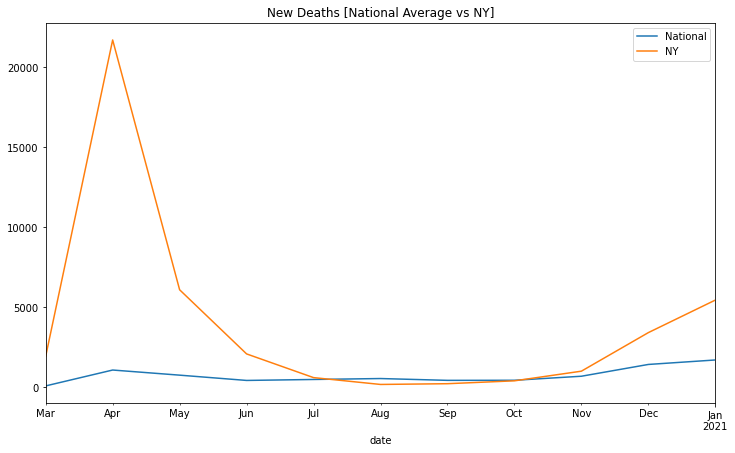

In [ ]:
national_df_new['new_deaths'].plot(figsize=(12,7)) 
ny_df_new['new_deaths'].plot(figsize=(12,7))
plt.title('New Deaths [National Average vs NY]')
plt.legend(['National','NY']);

### CODE

In [ ]:
national_df1.head()

,total_cases,total_deaths,new_cases,new_deaths
date,,,,
2020-03-31,3427.0,78.0,3427.0,78.0
2020-04-30,19559.0,1148.0,16133.0,1070.0
2020-05-31,32715.0,1898.0,13155.0,750.0
2020-06-30,48242.0,2317.0,15528.0,420.0
2020-07-31,83121.0,2797.0,34879.0,480.0


In [ ]:
national_df1['cases_pct'] = round(national_df_new['new_cases'].pct_change(),2)
national_df1['deaths_pct'] = round(national_df_new['new_deaths'].pct_change(),2)
national_df1.head()

,total_cases,total_deaths,new_cases,new_deaths,cases_pct,deaths_pct
date,,,,,,
2020-03-31,3427.0,78.0,3427.0,78.0,NaN,NaN
2020-04-30,19559.0,1148.0,16133.0,1070.0,3.71,12.67
2020-05-31,32715.0,1898.0,13155.0,750.0,-0.18,-0.30
2020-06-30,48242.0,2317.0,15528.0,420.0,0.18,-0.44
2020-07-31,83121.0,2797.0,34879.0,480.0,1.25,0.14


In [ ]:
national_data = national_df1.iloc[2:]
ny_data = ny_df1.iloc[2:]


### Visualization

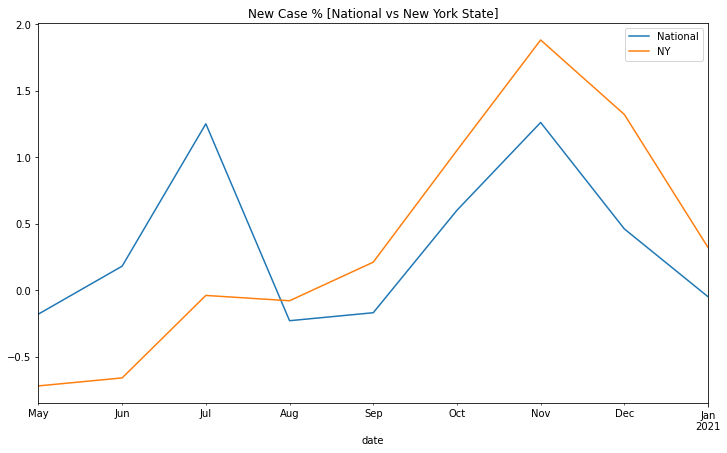

In [ ]:
national_data['cases_pct'].plot(figsize=(12,7)) # blue is national
ny_data['cases_pct'].plot(figsize=(12,7))
plt.title('New Case % [National vs New York State]')
plt.legend(['National','NY']);

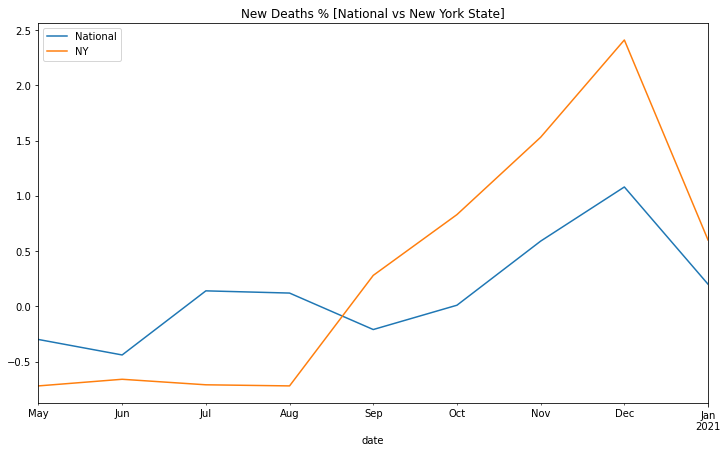

In [ ]:
national_data['deaths_pct'].plot(figsize=(12,7)) # blue is national
ny_data['deaths_pct'].plot(figsize=(12,7))
plt.title('New Deaths % [National vs New York State]')
plt.legend(['National','NY']);

# Unemployment

### code

In [ ]:
state_unemp_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/hackathon/data/state_unemployment_data_1.csv')
temp = state_unemp_df.set_index('State').T

In [ ]:
def unemp_wrangle(state):
  unemp_df = temp[[state]].copy()
  unemp_df.columns = ['unemp_rate']
  unemp_df.loc['Oct'] = (unemp_df.loc['July'] + unemp_df.loc['Aug']+ unemp_df.loc['Sept'])/3
  unemp_df.loc['Nov'] = (unemp_df.loc['Oct'] + unemp_df.loc['Aug']+ unemp_df.loc['Sept'])/3
  unemp_df.loc['Dec'] = (unemp_df.loc['Oct'] + unemp_df.loc['Nov']+ unemp_df.loc['Sept'])/3
  unemp_df['pct_change'] = unemp_df['unemp_rate'].pct_change()
  return round(unemp_df,2)

In [ ]:
states = ['New York','New Jersey', 'Pennsylvania', 'Massachusetts', 'Connecticut']
df_list = [unemp_wrangle(state) for state in states]
unemp_master = pd.concat(df_list, axis = 1, keys = states)
unemp_master

New York            New Jersey  ... Massachusetts Connecticut           
      unemp_rate pct_change unemp_rate  ...    pct_change  unemp_rate pct_change
Jan         3.80        NaN       3.80  ...           NaN        3.70        NaN
Feb         3.60      -0.05       4.80  ...          0.29        3.90       0.05
March       4.50       0.25       3.80  ...         -0.19        3.70      -0.05
April      14.50       2.22      15.30  ...          4.21        7.90       1.14
May        14.50       0.00      15.40  ...          0.10        9.60       0.22
June       15.70       0.08      16.60  ...          0.05        9.80       0.02
July       15.90       0.01      13.90  ...         -0.07       10.20       0.04
Aug        12.50      -0.21      10.90  ...         -0.30        8.10      -0.21
Sept        9.70      -0.22       6.70  ...         -0.15        7.80      -0.04
Oct        12.70       0.31      10.50  ...          0.28        8.70       0.12
Nov        11.63      -0.08       9.37  ...         -0.10        8.20      -0.06
Dec        11.34      -0.02       8.86  ...         -0.01        8.23       0.00

[12 rows x 10 columns]

### visualization

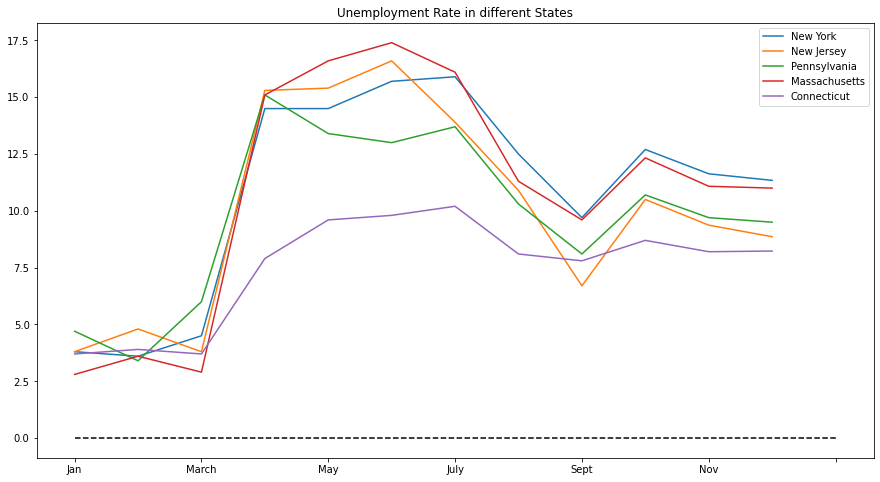

In [ ]:
fig, ax = plt.subplots()
for state in states:
  ax = unemp_master.loc[:, (state, 'unemp_rate')].plot(figsize = (15,8), ax = ax)
  ax.legend(states)
plt.hlines(0, xmin = 0, xmax = 12, linestyles = 'dashed')
plt.title('Unemployment Rate in different States');

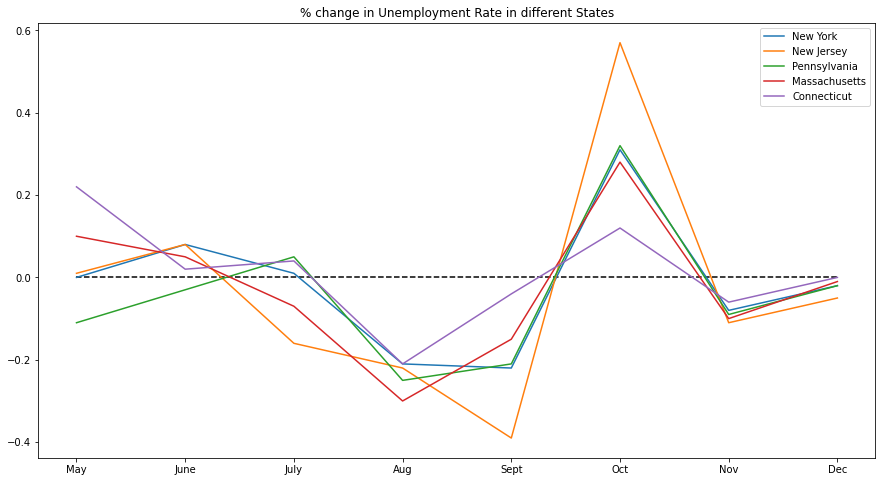

In [ ]:
fig, ax = plt.subplots()
for state in states:
  ax = unemp_master.loc['May':, (state, 'pct_change')].plot(figsize = (15,8), ax = ax)
  ax.legend(states)
plt.hlines(0, xmin = 0, xmax = 7, linestyles = 'dashed')
plt.title('% change in Unemployment Rate in different States');

# COVID-19 vs Unemployment [NY]

### code

In [ ]:
df_list = [ny_df1.loc[:'2020-Dec'], unemp_df.loc['March':].set_index(ny_df1.index[:-1])] # march to december

In [ ]:
master_df = pd.concat(df_list, axis = 1)
master_df

,total_cases,total_deaths,new_cases,new_deaths,cases_pct,deaths_pct,unemp_rate
date,,,,,,,
2020-03-31,76211,1929,76211,1929,NaN,NaN,4.50
2020-04-30,309696,23616,233485,21687,2.06,10.24,14.50
2020-05-31,375575,29699,65879,6083,-0.72,-0.72,14.50
2020-06-30,398142,31776,22567,2077,-0.66,-0.66,15.70
2020-07-31,419723,32372,21581,596,-0.04,-0.71,15.90
2020-08-31,439480,32541,19757,169,-0.08,-0.72,12.50
2020-09-30,463369,32757,23889,216,0.21,0.28,9.70
2020-10-31,512223,33152,48854,395,1.05,0.83,12.70
2020-11-30,652748,34150,140525,998,1.88,1.53,7.88


In [ ]:
master_df['unemp_pct'] = round(master_df['unemp_rate'].pct_change(),2)
master_df

,total_cases,total_deaths,new_cases,new_deaths,cases_pct,deaths_pct,unemp_rate,unemp_pct
date,,,,,,,,
2020-03-31,76211,1929,76211,1929,NaN,NaN,4.50,NaN
2020-04-30,309696,23616,233485,21687,2.06,10.24,14.50,2.22
2020-05-31,375575,29699,65879,6083,-0.72,-0.72,14.50,0.00
2020-06-30,398142,31776,22567,2077,-0.66,-0.66,15.70,0.08
2020-07-31,419723,32372,21581,596,-0.04,-0.71,15.90,0.01
2020-08-31,439480,32541,19757,169,-0.08,-0.72,12.50,-0.21
2020-09-30,463369,32757,23889,216,0.21,0.28,9.70,-0.22
2020-10-31,512223,33152,48854,395,1.05,0.83,12.70,0.31
2020-11-30,652748,34150,140525,998,1.88,1.53,7.88,-0.38


### visualization

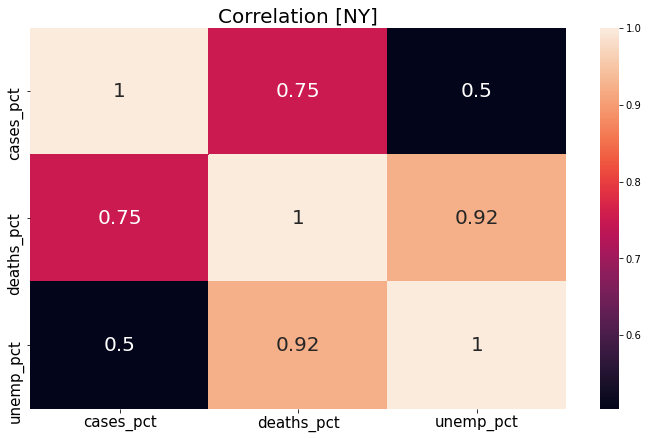

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(master_df[['cases_pct', 'deaths_pct', 'unemp_pct']].corr(), ax=ax, annot = True, annot_kws={"size":20})
ax.tick_params(labelsize=15)
plt.title('Correlation [NY]', fontsize = 20);

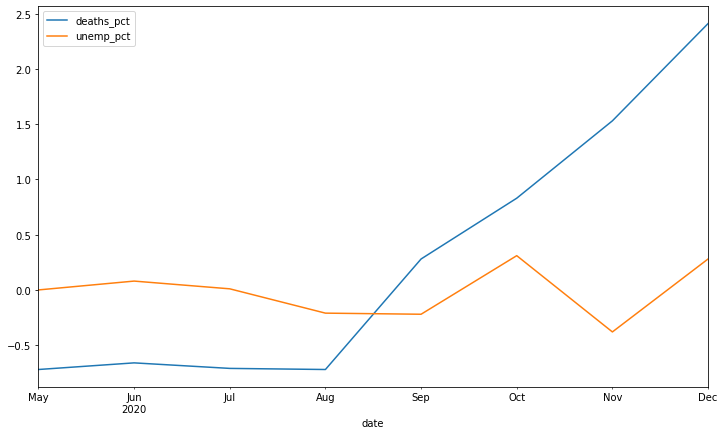

In [ ]:
master_df.loc['2020-5':,['deaths_pct', 'unemp_pct']].plot(figsize=(12,7)); # start in May because can't calculate % change for march, and April will naturally have a high % change because not a lot of cases were reported

# Conclusion

1. If we look at the number of new cases, we have reached a new peak in January. This is almost the double compared to the last peak. What could explain this phenomenon? Are people just not scared? Are they fed up?
2. However, even though the number of new deaths, are rising, they haven't even reached half of what we had back in April. This could possible be for various reasons, including how the medical sector is now dramatically well equipped  to handle patients. Perhaps, factors such as comorbidity, age, also plays a role. Perhaps, the most vulnerable population were hit the hardest in march. We don't know.
3. The North Eastern States we chose [ NJ, PA, MA, CT, NY] have been hit harder than other states in the fall and winter months


 

# The End